In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io    #用于加载 *.mat数据
import PIL.Image    #用于将矩阵表示为图像
import random
from scipy import optimize
from scipy.special import expit

In [2]:
datafile='data\ex3data1.mat'
data_matrix=scipy.io.loadmat(datafile)
X=np.array(data_matrix['X'])
y=np.array(data_matrix['y'])

In [3]:
m=X.shape[0] #样本数=5000
n=X.shape[1] #特征数=400
X=np.insert(X,0,1,axis=1)

print('The shape of X is {0}'.format(X.shape))
print('The shape of y is {0}, and unique elements in y: {1}'.format(y.shape,np.unique(y)))

The shape of X is (5000, 401)
The shape of y is (5000, 1), and unique elements in y: [ 1  2  3  4  5  6  7  8  9 10]


In [4]:
def arr2Img(arr):
    '''
    输入一个1x400的数组，将之转化为20x20的图像并返回
    '''
    width,height=20,20
    img=arr[1:].reshape(width,height)
    return img.T

def plotData(data=None):
    '''
    从X中随机选取100行，将每行转化为20x20的图像，
    并按10x10将这些图像组合起来输出为一个大图
    '''
    width,height = 20,20
    row,col=10,10
    if not data:
        data=random.sample(range(m),row*col)
    
    full_img_mat=np.zeros((height*row,width*col))
    
    irow,icol=0,0
    for i in data:
        if icol==col: #到达一行的末尾
            irow+=1
            icol=0
        img_mat=arr2Img(X[i]) #将X的第i行转化为图像
        #将img矩阵赋值给大图矩阵相应的位置
        full_img_mat[irow*height:irow*height+img_mat.shape[0],icol*width:icol*width+img_mat.shape[1]]=img_mat
        icol+=1
        
    plt.figure(figsize=(6,6))
    full_img=PIL.Image.fromarray(full_img_mat*255)
    plt.imshow(full_img)

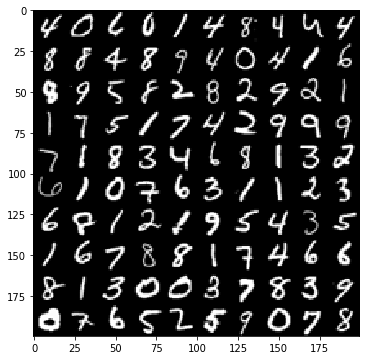

In [5]:
plotData()

In [36]:
def h(theta, X):
    return expit(np.dot(X,theta))

def cost(theta, X, y, mylambda):
    pos = -np.dot(y.T, np.log(h(theta, X)))
    neg = -np.dot((1-y).T, np.log(1-h(theta, X)))
    reg = (mylambda/2)*np.dot(theta.T, theta)
    return (1/m)*(pos+neg+reg)

In [138]:
def costGrad(theta, X, y, mylambda):
    tmp = h(theta, X)-y
    #reg = (mylambda/2)*theta[1:]
    grad = (1./m)*np.dot(X.T,tmp)
    #grad[1:] = grad[1:] + reg
    return grad

def opt(theta, X, y, mylambda):
    result = optimize.fmin_cg(cost, fprime=costGrad, x0=theta, args=(X, y, mylambda), maxiter=50, disp=False)
    return result

In [139]:
def onevsall(theta, X, y, mylambda, K):
    for i in range(1, K+1):
        myy = np.array([[1] if yy[0]==i else [0] for yy in y])
        itheta = opt(theta.reshape(-1), X, myy, mylambda)
        Theta[:,i-1:i] = itheta.reshape(401,1)
        print('Build theta{0} complete!'.format(i))
    print('Done!')

In [140]:
K=10
theta_init = np.zeros((X.shape[1],1))
Theta = np.zeros((X.shape[1],K))

In [141]:
onevsall(theta_init, X, y, 0, K)

ValueError: shapes (401,5000) and (401,5000) not aligned: 5000 (dim 1) != 401 (dim 0)

In [126]:
np.array([[1],[2],[3]]).reshape(-1)

array([1, 2, 3])